# Movie remakes analysis

In [2]:
# import required libraries

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import csv
import os
import re

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats
import json
import ast

## Loading data

In [4]:
# load movie metadata

data_folder = '../data/'
# Load movie metadata
df_movies = pd.read_csv(data_folder + "enrich_movie_data.csv")

# Load charachter metadata
column_names_char = ['Wikipedia_movie_ID', 'Freebase_movie', 'movie_release_date', 'character_name', 'actor_DOB', 'gender', 'height', 'ethnicity', 'actor_name', 'actor_age', 'freebase_map', '1','2']
tsv_file_char = data_folder + 'MovieSummaries/character.metadata.tsv'
df_chars = pd.read_table(tsv_file_char, sep='\t', names=column_names_char)

C:\Users\Amirmahdi\AppData\Local\Temp\ipykernel_10928\598760383.py:5: DtypeWarning: Columns (13,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies = pd.read_csv(data_folder + "enrich_movie_data.csv")


In [7]:
# load movie remakes data

remakes_df = pd.read_csv(data_folder + 'remake/remakes.csv')


73224

In [10]:
df_movies.head()

,Wikipedia_movie_ID,Freebase_movie_ID,movie_name,movie_revenue,movie_runtime,movie_countries,movie_genres,wikidata_id,cmu_year,tmdb_id,...,vote_average,vote_count,adult,budget,imdb_id,original_language,overview,popularity,keywords,wikidata_id.1
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,United States of America,"Science Fiction, Space western, Horror, Supern...",Q261700,2001.0,10016.0,...,5.127,977.0,False,28000000.0,tt0228333,en,"In 2176, a Martian police unit is sent to pick...",14.189,"future, planet mars, anti hero, possession, ho...",NaN
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,United States of America,"Crime Drama, Mystery, Biographical film, Drama",Q16250726,2000.0,784579.0,...,NaN,NaN,False,NaN,tt0245916,en,Dramatization of the story behind the murder o...,0.600,"colorado, jonbenet",NaN
2,28463795,/m/0crgdbh,Brun bitter,NaN,83.0,Norway,"Crime Fiction, Drama",Q4978832,1988.0,396302.0,...,NaN,NaN,False,NaN,tt0094806,no,A stolen bicycle case ends with drunken detect...,0.898,"bicycle, private detective",NaN
3,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,United Kingdom,"Psychological thriller, Thriller, Erotic thriller",Q7995657,1987.0,33592.0,...,5.742,64.0,False,NaN,tt0094320,en,"In a wealthy and isolated desert community, a ...",8.297,"based on novel or book, gas station, psychopat...",NaN
4,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,Germany,Drama,Q869644,1983.0,11192.0,...,5.300,13.0,False,NaN,tt0083949,de,"Eva, an upper-class housewife, frustratedly le...",2.801,"jealousy, eroticism, gigolo, longing, dominatr...",NaN


In [9]:
remakes_df.head()

,original,original_year,original_url,remake,remake_year,remake_url,original_wikidata_id,remake_wikidata_id
0,12 Angry Men,1957,https://en.wikipedia.org/wiki/12_Angry_Men_(19...,12 Angry Men (1997),1997,https://en.wikipedia.org/wiki/12_Angry_Men_(19...,Q2345,Q386042
1,13 Assassins,1963,https://en.wikipedia.org/wiki/13_Assassins_(19...,13 Assassins,2010,https://en.wikipedia.org/wiki/13_Assassins_(20...,Q3230304,Q186810
2,13 Ghosts,1960,https://en.wikipedia.org/wiki/13_Ghosts,Thirteen Ghosts,2001,https://en.wikipedia.org/wiki/Thirteen_Ghosts,Q541412,Q186864
3,13 Tzameti,2005,https://en.wikipedia.org/wiki/13_Tzameti,13,2010,https://en.wikipedia.org/wiki/13_(2010_film),Q186900,Q186799
4,3 Idiots,2009,https://en.wikipedia.org/wiki/3_Idiots,Nanban,2012,https://en.wikipedia.org/wiki/Nanban_(2012_film),Q229633,Q683308


In [ ]:
originals_df = pd.merge(df_movies, remakes_df, left_on = "", right_on = "remake_wikidata_id", how = "inner")
originals_df = originals_df[df_movies.columns]

In [ ]:
# List of original movies that are not in the CMU dataset

remakes_df[~(remakes_df["original"].isin(df_movies["movie_name"]))]

,original,original_year,remake_1,remake_1_year
2,13 Tzameti,2005,13,2010
3,3 Idiots,2009,Nanban,2012
7,7th Heaven,1927,Seventh Heaven,1937
25,Antropophagus,1980,Anthropophagous 2000,1999
31,Arjun Reddy,2017,Kabir Singh,2019
...,...,...,...,...
544,Vash,2023,Shaitaan,2024
545,Veeram,2014,Kisi Ka Bhai Kisi Ki Jaan,2023
546,Victor and Victoria,1933,First a Girl,1935
563,The White Outlaw,1929,The Apache Kid's Escape,1930


In [ ]:
remakes1 = pd.merge(df_movies, remakes_df, left_on = ["movie_name", "movie_year"], right_on = ["remake_1", "remake_1_year"], how = "inner")
remakes1 = remakes1[df_movies.columns]

# remakes2 = pd.merge(df_movies, remakes_df, left_on = ["movie_name", "movie_year"], right_on = ["remake_2", "remake_2_year"], how = "inner")
# remakes2 = remakes2[df_movies.columns]

# remakes3 = pd.merge(df_movies, remakes_df, left_on = ["movie_name", "movie_year"], right_on = ["remake_3", "remake_3_year"], how = "inner")
# remakes3 = remakes3[df_movies.columns]

# remakes4 = pd.merge(df_movies, remakes_df, left_on = ["movie_name", "movie_year"], right_on = ["remake_4", "remake_4_year"], how = "inner")
# remakes4 = remakes4[df_movies.columns]

# remakes_only = pd.concat([remakes1, remakes2, remakes3, remakes4], ignore_index=True)
remakes_only = remakes1.copy()

## Revenue Analysis

In [ ]:
print("Mean revenue for original movies:", originals_df["movie_revenue"].mean())

Mean revenue for original movies: 56025744.85185185


In [ ]:
print("Mean revenue for whole dataset:", df_movies["movie_revenue"].mean())

Mean revenue for whole dataset: 47993625.22211642


In [ ]:
print("Mean revenue for remakes:", remakes_only["movie_revenue"].mean())

Mean revenue for remakes: 68457337.3080808


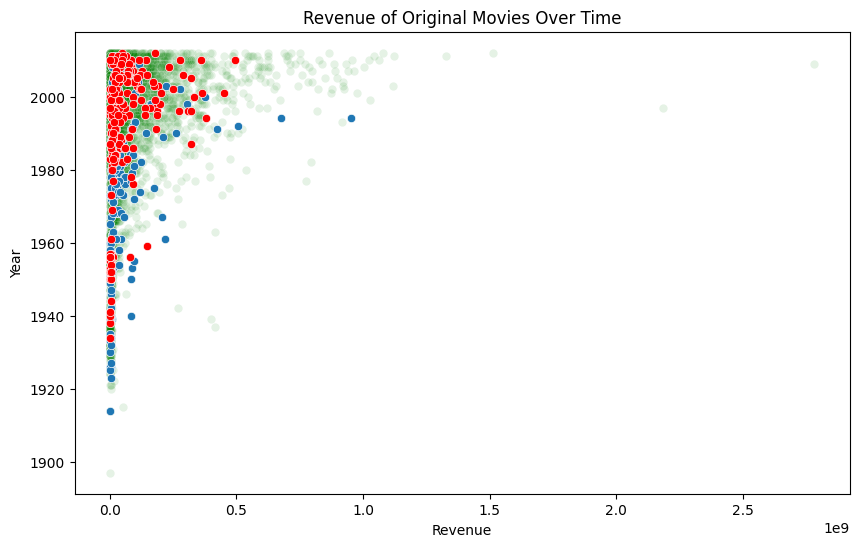

In [ ]:
# scatter plot of revenues and runtimes of original movies
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_movies, x="movie_revenue", y="movie_year", color="green", alpha=0.1)

sns.scatterplot(data=originals_df, x="movie_revenue", y="movie_year")

sns.scatterplot(data=remakes_only, x="movie_revenue", y="movie_year", color="red")


plt.title("Revenue of Original Movies Over Time")
plt.xlabel("Revenue")
plt.ylabel("Year")
plt.show()

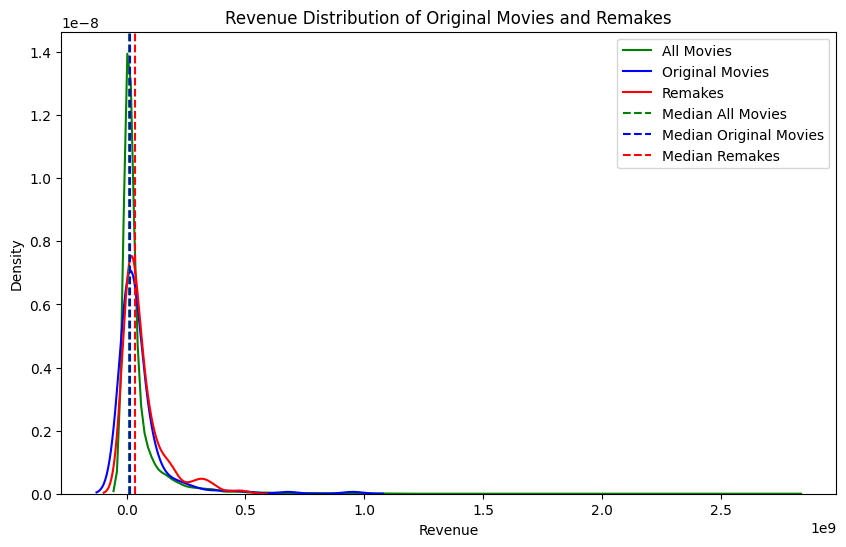

In [ ]:
# kde plot of revenues of original movies

plt.figure(figsize=(10, 6))

sns.kdeplot(data=df_movies["movie_revenue"], color="green", label="All Movies")

sns.kdeplot(data=originals_df["movie_revenue"], color="blue", label="Original Movies")

sns.kdeplot(data=remakes_only["movie_revenue"], color="red", label="Remakes")

# add the median of each group

plt.axvline(df_movies["movie_revenue"].median(), color="green", linestyle="--", label="Median All Movies")
plt.axvline(originals_df["movie_revenue"].median(), color="blue", linestyle="--", label="Median Original Movies")
plt.axvline(remakes_only["movie_revenue"].median(), color="red", linestyle="--", label="Median Remakes")

plt.title("Revenue Distribution of Original Movies and Remakes")
plt.xlabel("Revenue")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
# add revenue of remakes to remakes_df

remakes_df = pd.merge(remakes_df, df_movies[["movie_name", "movie_year", "movie_revenue"]], left_on = ["remake_1", "remake_1_year"], right_on = ["movie_name", "movie_year"], how = "left")

remakes_df = remakes_df.drop(columns=["movie_name", "movie_year"])

remakes_df = remakes_df.rename(columns={"movie_revenue": "remake_1_revenue"})

In [ ]:
remakes_df = pd.merge(remakes_df, df_movies[["movie_name", "movie_year", "movie_revenue"]], left_on = ["original", "original_year"], right_on = ["movie_name", "movie_year"], how = "left")

remakes_df = remakes_df.drop(columns=["movie_name", "movie_year"])

remakes_df = remakes_df.rename(columns={"movie_revenue": "original_revenue"})

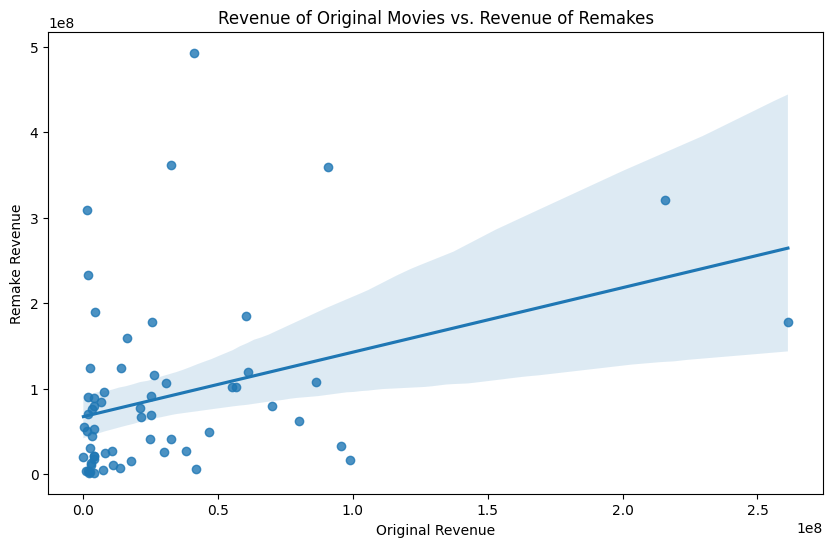

In [ ]:
# scatter plot of revenues of original movies vs. revenues of remakes

plt.figure(figsize=(10, 6))

sns.regplot(data=remakes_df, x="original_revenue", y="remake_1_revenue")

plt.title("Revenue of Original Movies vs. Revenue of Remakes")
plt.xlabel("Original Revenue")
plt.ylabel("Remake Revenue")
plt.show()

In [ ]:
remakes_df["revenue_increase"] = remakes_df["remake_1_revenue"] - remakes_df["original_revenue"]

In [ ]:
remakes_df["year_difference"] = remakes_df["remake_1_year"] - remakes_df["original_year"]

In [ ]:
remakes_df["revenue_increase"].mean()

59949507.35483871

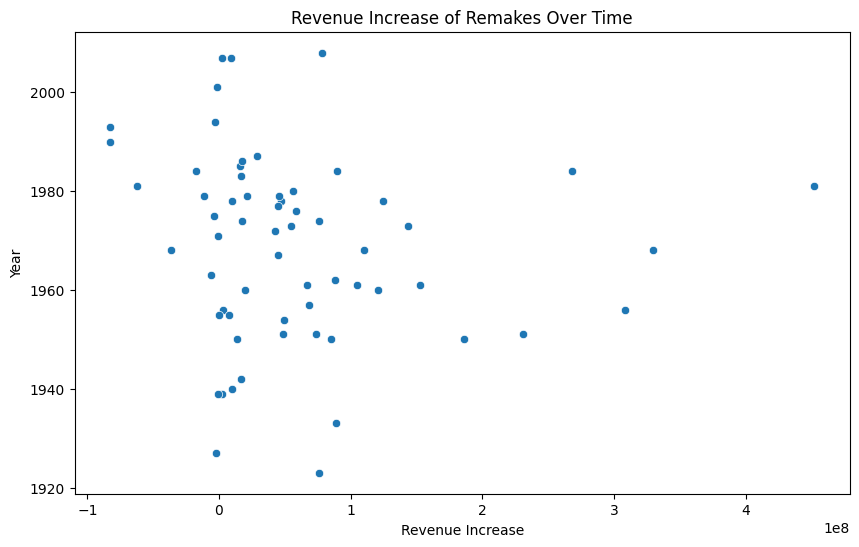

In [ ]:
# scatter plot of revenue increase and year of original movie

plt.figure(figsize=(10, 6))

sns.scatterplot(data=remakes_df, x="revenue_increase", y="original_year")

plt.title("Revenue Increase of Remakes Over Time")
plt.xlabel("Revenue Increase")
plt.ylabel("Year")
plt.show()

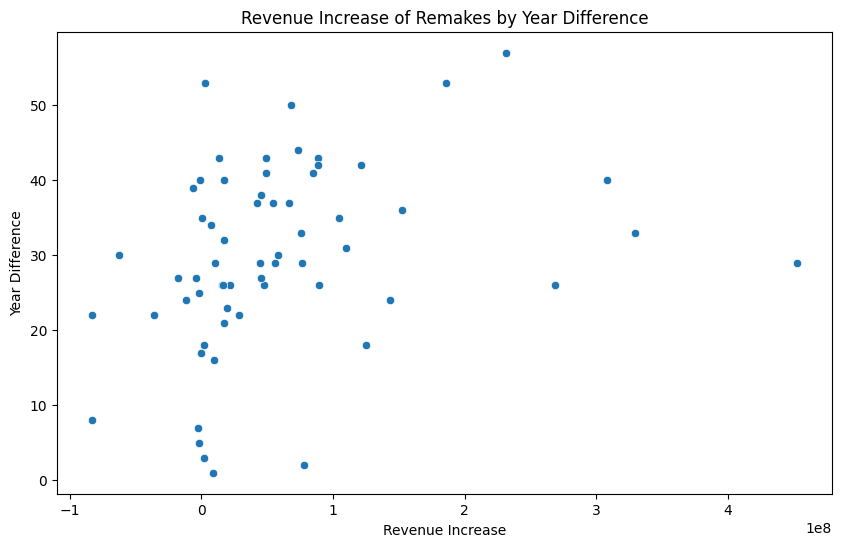

In [ ]:
# scatter plot of revenue increase and year of original movie

plt.figure(figsize=(10, 6))

sns.scatterplot(data=remakes_df, x="revenue_increase", y="year_difference")

plt.title("Revenue Increase of Remakes by Year Difference")
plt.xlabel("Revenue Increase")
plt.ylabel("Year Difference")
plt.show()

## Movie stars analysis

In [ ]:
# movie stars

movie_stars = df_chars["actor_name"].value_counts().head(100).index

In [ ]:
movie_stars_df = df_chars.groupby("Wikipedia_movie_ID")["actor_name"].apply(lambda x: x.isin(movie_stars).sum()).reset_index(name="movie_stars")

In [ ]:
df_movies = pd.merge(df_movies, movie_stars_df, on="Wikipedia_movie_ID", how="left")
df_movies

,Wikipedia_movie_ID,Freebase_movie_ID,movie_name,movie_date,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_year,movie_stars
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Horror, Adventure, Supernatural, Space western...",2001.0,0.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"Crime Drama, Biographical film, Drama, Mystery",2000.0,0.0
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"Drama, Crime Fiction",1988.0,0.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"Psychological thriller, Erotic thriller, Thriller",1987.0,0.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,Drama,1983.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,English Language,United States of America,Drama,2011.0,NaN
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,English Language,"Ireland, United Kingdom","Biographical film, Documentary, Drama",2011.0,NaN
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,English Language,United States of America,"Satire, Comedy",1972.0,0.0
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,Japanese Language,Japan,"Adventure, Animation, Japanese Movies, Short F...",1992.0,0.0


In [ ]:
# movies which have co-stars

remakes1 = pd.merge(remakes1, movie_stars_df, on="Wikipedia_movie_ID", how="left")
remakes1

,Wikipedia_movie_ID,Freebase_movie_ID,movie_name,movie_date,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_year,movie_stars
0,10705531,/m/02qmrx5,On the Beach,2000,NaN,195.0,English Language,"United States of America, Australia","Science Fiction, Television movie, Action/Adve...",2000.0,0.0
1,4002677,/m/0bb_jr,The 39 Steps,1959-03-13,NaN,93.0,English Language,United Kingdom,"Suspense, Mystery, Film adaptation, Remake, Sp...",1959.0,0.0
2,22358819,/m/05szq8z,Clash of the Titans,2010-03-26,493214993.0,96.0,English Language,"United States of America, United Kingdom","Adventure, Remake, Action/Adventure, Fantasy, ...",2010.0,0.0
3,5884079,/m/0fbrd7,Bangkok Dangerous,2008-08-22,82486154.0,97.0,"Thai Language, English Language",United States of America,"Crime Thriller, Crime Fiction, Action/Adventur...",2008.0,0.0
4,18579003,/m/04f_wj4,The Good Companions,1957-04-22,NaN,104.0,English Language,United Kingdom,Musical,1957.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
382,8634603,/m/027bx6_,The Plank,1979,NaN,30.0,English Language,United Kingdom,"Short Film, Comedy",1979.0,0.0
383,699336,/m/033t6r,Nine Months,1995-07-14,138510230.0,103.0,English Language,United States of America,"Romance Film, Romantic comedy, Comedy, Domesti...",1995.0,0.0
384,4057650,/m/0bfy61,To Be or Not to Be,1983-12-16,13030214.0,107.0,English Language,United States of America,"Parody, Satire, Comedy, LGBT",1983.0,0.0
385,5971762,/m/0fhdck,The Truth About Charlie,2002-10-16,7093284.0,104.0,"Arabic Language, English Language, French Lang...","United States of America, Germany","Suspense, Crime Thriller, Mystery, Comedy, Rom...",2002.0,0.0


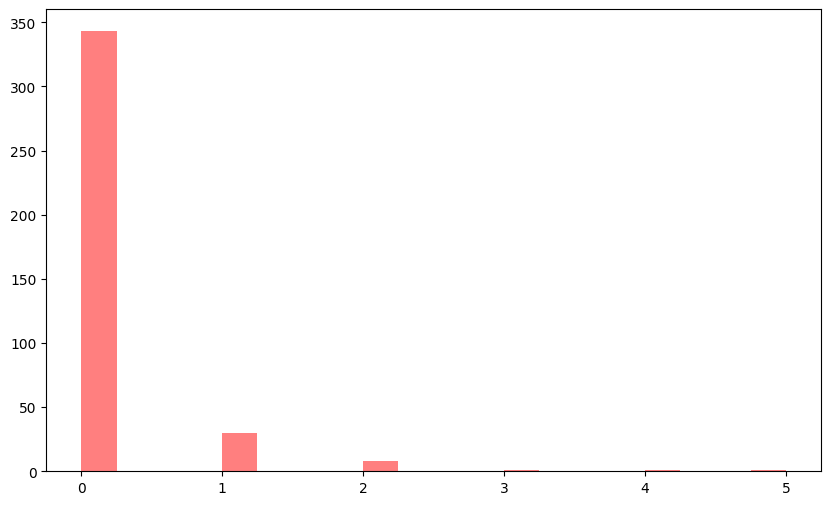

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(remakes1["movie_stars"], bins=20, color="red", alpha=0.5, label="Remakes")
plt.show()

In [ ]:
originals_df = pd.merge(originals_df, movie_stars_df, on="Wikipedia_movie_ID", how="left")
originals_df

,Wikipedia_movie_ID,Freebase_movie_ID,movie_name,movie_date,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_year,movie_stars
0,196176,/m/01bwgr,Straw Dogs,1971-11-03,11148828.0,118.0,English Language,"United States of America, United Kingdom","Drama, Thriller",1971.0,0.0
1,413207,/m/025cm9,Taxi,1998-04-08,NaN,86.0,French Language,France,"Comedy, Crime Fiction, Buddy film",1998.0,0.0
2,1135297,/m/04993j,13 Ghosts,1960-07,NaN,172.0,English Language,United States of America,Horror,1960.0,0.0
3,9404578,/m/0287gvq,The Lady Vanishes,1938,NaN,97.0,English Language,United Kingdom,"Mystery, Comedy, Spy, Black-and-white, Psychol...",1938.0,0.0
4,17711304,/m/047n81_,Rendezvous,1935-10-24,NaN,94.0,English Language,United States of America,"Spy, Black-and-white",1935.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
455,5082822,/m/0d1yd3,Going in Style,1979,NaN,98.0,English Language,United States of America,"Caper story, Crime Comedy, Slapstick, Heist, C...",1979.0,0.0
456,253833,/m/01ln7k,The Mummy,1932-12-22,NaN,74.0,English Language,United States of America,"Horror, Monster movie, Archaeology, Pre-Code, ...",1932.0,1.0
457,80923,/m/0kxg6,A Letter to Three Wives,1949-01-20,NaN,103.0,English Language,United States of America,"Mystery, Film adaptation, Comedy, Drama, Roman...",1949.0,0.0
458,616805,/m/02x0cf,Kiss of Death,1947-08-27,NaN,98.0,English Language,United States of America,"Crime Thriller, Crime Fiction, Film noir, Blac...",1947.0,0.0


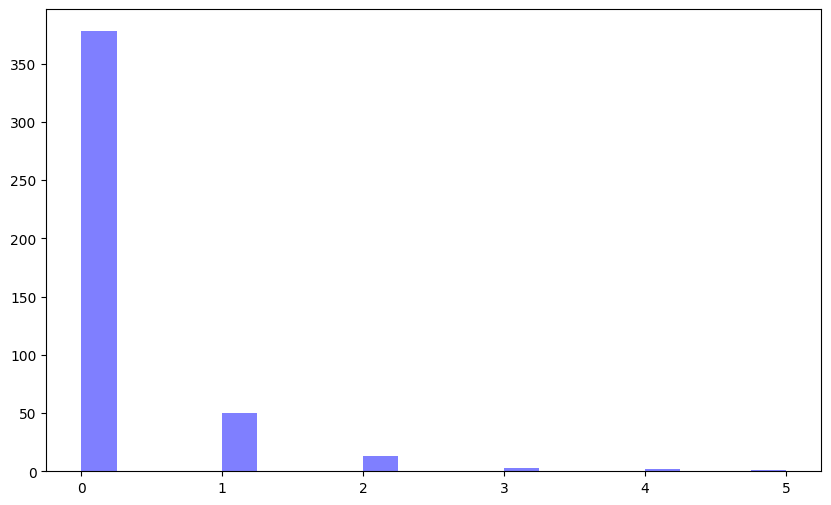

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(originals_df["movie_stars"], bins=20, color="blue", alpha=0.5, label="Originals")
plt.show()


In [ ]:
# genre analysis

df_movies["movie_genres"].value_counts()

movie_genres
Drama                                                                                                      6851
Comedy                                                                                                     2040
Documentary                                                                                                2001
Comedy film                                                                                                1387
Short Film                                                                                                 1211
                                                                                                           ... 
Epic Western, Romance Film, Western, Action/Adventure, Drama                                                  1
Computer Animation, Satire, Science Fiction, Indie, Fantasy                                                   1
Animation, Short Film, Comedy, Fantasy, Sports                                             

In [ ]:
# TODO: Correlation between the number of stars in the original and remake

## Summary plot analysis